In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df= pd.read_csv("C:\\Users\\Ishwari\\Downloads\\Shipping_data.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Maximum weight of the product is up too 8,000 and the Maximum discount on the product is 65%.

In [14]:
df.shape

(10999, 12)

In [15]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# EDA

#  Univariate analysis

<Axes: xlabel='Warehouse_block'>

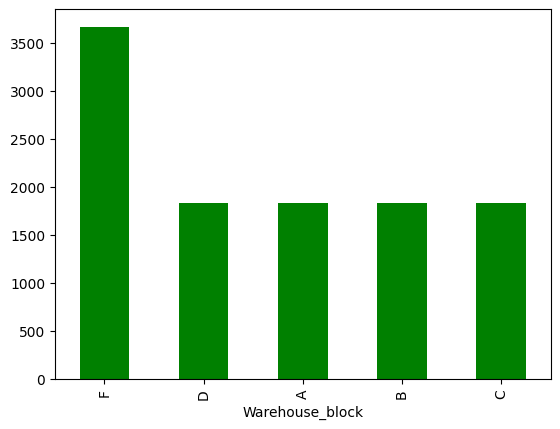

In [16]:
c=["green"]
df.value_counts("Warehouse_block").plot(kind="bar",color=c)


max products are shipped from "F" Warehouse block

<Axes: ylabel='count'>

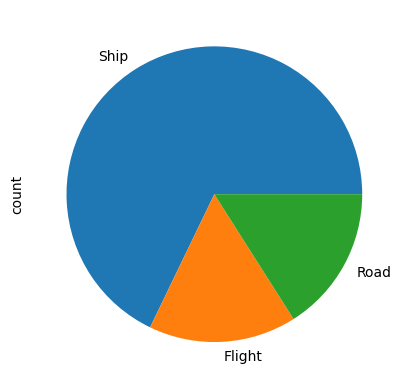

In [17]:
df.value_counts("Mode_of_Shipment").plot(kind="pie")

Most prefered mode of shipping by customers is ship mode

<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

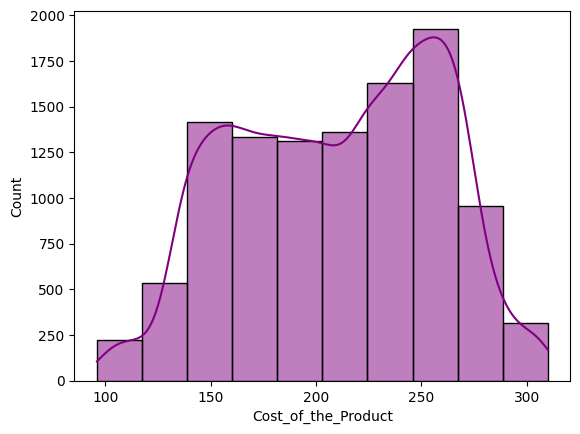

In [18]:
sns.histplot(data=df,x="Cost_of_the_Product",kde=True, bins= 10,color="purple")

Maximum cost of the product that has been shipped is in the range 230-260 

<Axes: xlabel='Prior_purchases', ylabel='Count'>

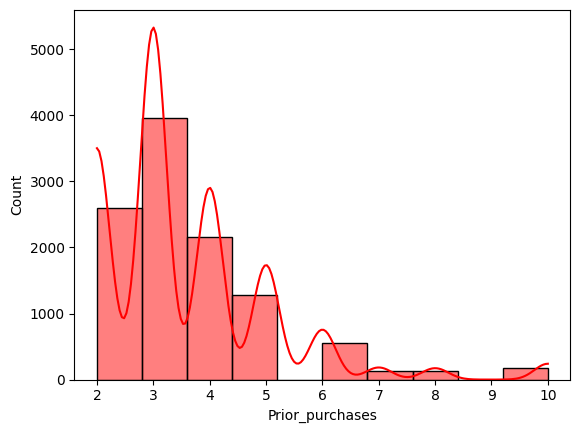

In [19]:
sns.histplot(data=df,x="Prior_purchases",kde=True, bins= 10,color="red")

After certain time the delivery of the product shipping is decreasing

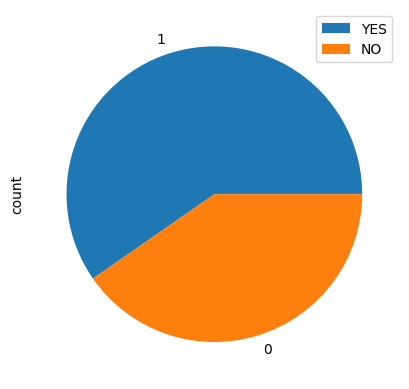

In [20]:
df.value_counts("Reached.on.Time_Y.N").plot(kind="pie")
plt.legend({"YES":1,"NO":0,})

maximum products are reached on time.

# Bivariate / multivariate analysis

<Axes: xlabel='Weight_in_gms', ylabel='Count'>

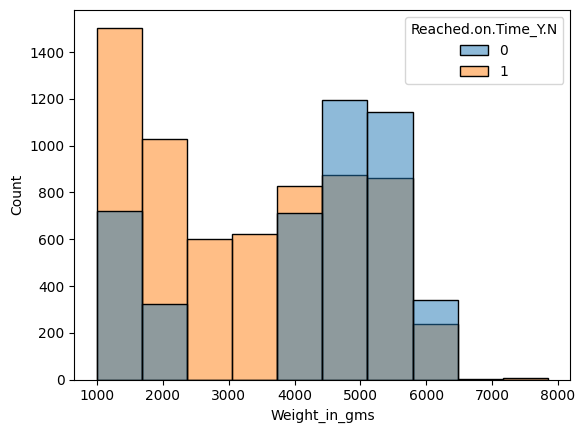

In [27]:
sns.histplot(data=df,x="Weight_in_gms",hue="Reached.on.Time_Y.N",bins=10)

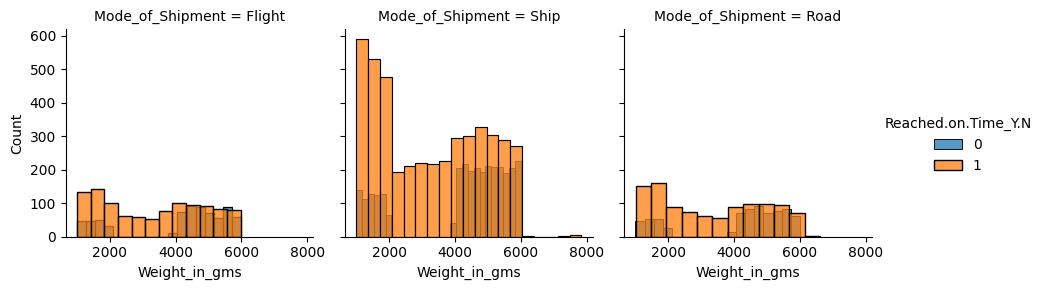

In [28]:
mode = sns.FacetGrid(df, col="Mode_of_Shipment", hue="Reached.on.Time_Y.N")
mode.map(sns.histplot, "Weight_in_gms")
mode.add_legend()


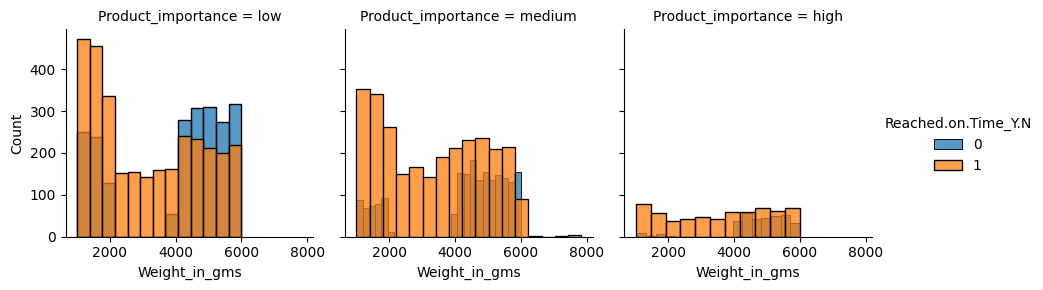

In [29]:
mode = sns.FacetGrid(df, col="Product_importance", hue="Reached.on.Time_Y.N")
mode.map(sns.histplot, "Weight_in_gms")
mode.add_legend()


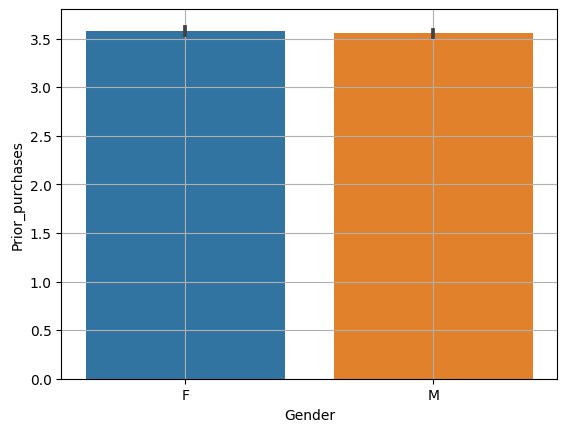

In [24]:
sns.barplot(data=df,x="Gender",y="Prior_purchases")
plt.grid()

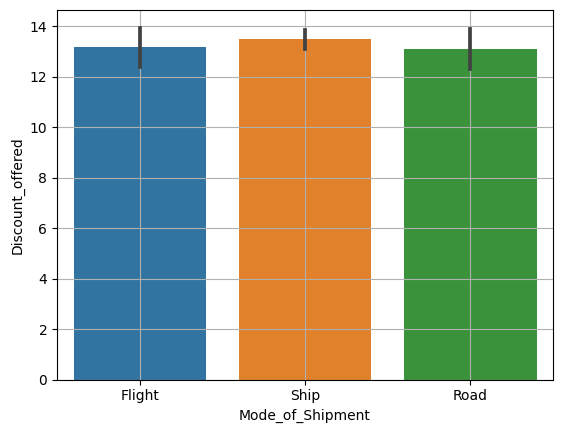

In [25]:
sns.barplot(data=df,y="Discount_offered",x="Mode_of_Shipment")
plt.grid()